In [1]:
import pandas as pd
import matplotlib.pyplot as plt

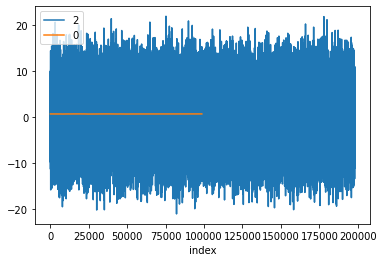

In [3]:
df_lia = pd.read_csv("data/mean.txt", header=None)
df_lia.reset_index(inplace=True)

df_raw = pd.read_csv("data/simulados.txt", header=None, sep=" ")
df_raw.reset_index(inplace=True)

fig, ax = plt.subplots()
df_raw.plot(x="index", y=2, ax=ax)
df_lia.plot(x="index", y=0, ax=ax)

plt.show()

In [50]:
# Simulating data for a lock-in amplifier

import numpy as np

x = np.linspace(0, 1, df_raw.shape[0])
y = np.sin(x)
y_white = y + np.random.normal(0, 5, df_raw.shape[0])

df = pd.DataFrame({"x": df_raw[0], "y": y, "y_white": y_white})
df["y_ref"] = df["y"].apply(lambda x: 0 if x < 0 else 2000)
df.drop(columns=["y"], inplace=True)
df = df[["x", "y_ref", "y_white"]]
df.to_csv("data/simulados.txt", header=None, index=None, sep=" ")